In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Open the trips.csv file
trips = pd.read_csv(".../data.csv", index_col=0)

In [3]:
trips.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number
0,506.0,01/01/2020 00:09,Rosedale Rec Center,31658.0,NaN,Member,01/01/2020 00:00,Columbus Circle / Union Station,31623.0
1,1050.0,01/01/2020 00:18,Potomac & Pennsylvania Ave SE,31606.0,NaN,Member,01/01/2020 00:01,Eastern Market Metro / Pennsylvania Ave & 7th ...,31613.0
2,1687.0,01/01/2020 00:30,Constitution Ave & 2nd St NW/DOL,31271.0,NaN,Member,01/01/2020 00:02,L'Enfant Plaza / 7th & C St SW,31218.0
3,182.0,01/01/2020 00:05,Gallaudet / 8th St & Florida Ave NE,31508.0,NaN,Member,01/01/2020 00:02,3rd & M St NE,31627.0
4,1002.0,01/01/2020 00:22,10th & G St NW,31274.0,NaN,Member,01/01/2020 00:06,Jefferson Dr & 14th St SW,31247.0


In [4]:
# Change type of start_time and end_date to datetime
trips = trips.astype({"start_date": "datetime64"})
trips = trips.astype({"end_date": "datetime64"})

In [5]:
# Check the types of the trips dataframe
trips.dtypes

duration                       float64
end_date                datetime64[ns]
end_station                     object
end_station_number             float64
End station number.1            object
member_type                     object
start_date              datetime64[ns]
start_station                   object
start_station_number           float64
dtype: object

In [6]:
# Select the data specific to the bike station number 31245
trips_31245 = trips[trips['start_station_number']==31245] 

In [7]:
# Check the head of trips_31245
trips_31245.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number
145,475.0,2020-01-01 01:26:00,18th & R St NW,31278.0,NaN,Member,2020-01-01 01:18:00,7th & R St NW / Shaw Library,31245.0
286,413.0,2020-01-01 02:37:00,Florida Ave & R St NW,31503.0,NaN,Member,2020-01-01 02:30:00,7th & R St NW / Shaw Library,31245.0
608,401.0,2020-01-01 09:42:00,7th & F St NW / National Portrait Gallery,31232.0,NaN,Member,2020-01-01 09:36:00,7th & R St NW / Shaw Library,31245.0
922,497.0,2020-01-01 11:17:00,Thomas Circle,31241.0,NaN,Member,2020-01-01 11:08:00,7th & R St NW / Shaw Library,31245.0
1138,450.0,2020-01-01 12:02:00,14th & V St NW,31101.0,NaN,Member,2020-01-01 11:55:00,7th & R St NW / Shaw Library,31245.0


In [26]:
# Create new columns with the day of the week and the hour of the day using start_date.
trips["start_day"] = trips["start_date"].dt.weekday_name

In [27]:
trips["start_hour"] = trips["start_date"].dt.hour

In [28]:
# Check the head of trips
trips.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number,start_day,start_hour
0,506.0,2020-01-01 00:09:00,Rosedale Rec Center,31658.0,NaN,Member,2020-01-01 00:00:00,Columbus Circle / Union Station,31623.0,Wednesday,0
1,1050.0,2020-01-01 00:18:00,Potomac & Pennsylvania Ave SE,31606.0,NaN,Member,2020-01-01 00:01:00,Eastern Market Metro / Pennsylvania Ave & 7th ...,31613.0,Wednesday,0
2,1687.0,2020-01-01 00:30:00,Constitution Ave & 2nd St NW/DOL,31271.0,NaN,Member,2020-01-01 00:02:00,L'Enfant Plaza / 7th & C St SW,31218.0,Wednesday,0
3,182.0,2020-01-01 00:05:00,Gallaudet / 8th St & Florida Ave NE,31508.0,NaN,Member,2020-01-01 00:02:00,3rd & M St NE,31627.0,Wednesday,0
4,1002.0,2020-01-01 00:22:00,10th & G St NW,31274.0,NaN,Member,2020-01-01 00:06:00,Jefferson Dr & 14th St SW,31247.0,Wednesday,0


In [29]:
# Group by start_hour and start_day and count the number of trips
trips_day_count = trips.groupby(["start_hour","start_day"]).count()

In [30]:
# Check trips_day head
trips_day_count.head()

duration  end_date  end_station  end_station_number  \
start_hour start_day                                                        
0          Friday         2076      2076         1509                1883   
           Monday         1920      1920         1567                1731   
           Saturday       4493      4493         3650                4135   
           Sunday         4080      4080         3526                3800   
           Thursday       2005      2005         1643                1831   

                      End station number.1  member_type  start_date  \
start_hour start_day                                                  
0          Friday                      374         2076        2076   
           Monday                      164         1920        1920   
           Saturday                    485         4493        4493   
           Sunday                      274         4080        4080   
           Thursday                    188         2005        2005   

                      start_station  start_station_number  
start_hour start_day                                       
0          Friday              1893                  1893  
           Monday              1755                  1755  
           Saturday            4147                  4147  
           Sunday              3836                  3836  
           Thursday            1822                  1822

In [31]:
# Select the data specific to the bike station number 31245
trips_31245 = trips[trips['start_station_number']==31245] 

In [32]:
# Check the head of trips_31245
trips_31245.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number,start_day,start_hour
145,475.0,2020-01-01 01:26:00,18th & R St NW,31278.0,NaN,Member,2020-01-01 01:18:00,7th & R St NW / Shaw Library,31245.0,Wednesday,1
286,413.0,2020-01-01 02:37:00,Florida Ave & R St NW,31503.0,NaN,Member,2020-01-01 02:30:00,7th & R St NW / Shaw Library,31245.0,Wednesday,2
608,401.0,2020-01-01 09:42:00,7th & F St NW / National Portrait Gallery,31232.0,NaN,Member,2020-01-01 09:36:00,7th & R St NW / Shaw Library,31245.0,Wednesday,9
922,497.0,2020-01-01 11:17:00,Thomas Circle,31241.0,NaN,Member,2020-01-01 11:08:00,7th & R St NW / Shaw Library,31245.0,Wednesday,11
1138,450.0,2020-01-01 12:02:00,14th & V St NW,31101.0,NaN,Member,2020-01-01 11:55:00,7th & R St NW / Shaw Library,31245.0,Wednesday,11


In [33]:
# Select the only rows that are interesting for the analysis 
trips = trips[["duration", "start_date", "start_station_number", "start_day"]]

In [34]:
# Convert the start_date column to a new column with the date and the hour (without minutes and second) as the prediction of use
# will be done by hour
trips["start_date_hour"] = trips["start_date"].apply(lambda x: x.strftime("%Y-%m-%d %H:00"))

In [35]:
trips_31245.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number,start_day,start_hour
145,475.0,2020-01-01 01:26:00,18th & R St NW,31278.0,NaN,Member,2020-01-01 01:18:00,7th & R St NW / Shaw Library,31245.0,Wednesday,1
286,413.0,2020-01-01 02:37:00,Florida Ave & R St NW,31503.0,NaN,Member,2020-01-01 02:30:00,7th & R St NW / Shaw Library,31245.0,Wednesday,2
608,401.0,2020-01-01 09:42:00,7th & F St NW / National Portrait Gallery,31232.0,NaN,Member,2020-01-01 09:36:00,7th & R St NW / Shaw Library,31245.0,Wednesday,9
922,497.0,2020-01-01 11:17:00,Thomas Circle,31241.0,NaN,Member,2020-01-01 11:08:00,7th & R St NW / Shaw Library,31245.0,Wednesday,11
1138,450.0,2020-01-01 12:02:00,14th & V St NW,31101.0,NaN,Member,2020-01-01 11:55:00,7th & R St NW / Shaw Library,31245.0,Wednesday,11


In [36]:
# Change type of start_date_hour to datetime as it is a string.
trips = trips.astype({"start_date_hour": "datetime64"})

In [37]:
# Check the types of the dataframe
trips.dtypes

duration                       float64
start_date              datetime64[ns]
start_station_number           float64
start_day                       object
start_date_hour         datetime64[ns]
dtype: object

In [38]:
# Remove start_date column as we don't need it anymore
trips = trips.drop(columns=['start_date'])

In [39]:
# Group by start_date_hour and count the number of trips
trips = trips.groupby(["start_date_hour"]).count()

In [40]:
trips.head()

,duration,start_station_number,start_day
start_date_hour,,,
2020-01-01 00:00:00,106,106,106
2020-01-01 01:00:00,120,120,120
2020-01-01 02:00:00,102,102,102
2020-01-01 03:00:00,40,40,40
2020-01-01 04:00:00,15,15,15


In [41]:
trips.shape

(8738, 3)

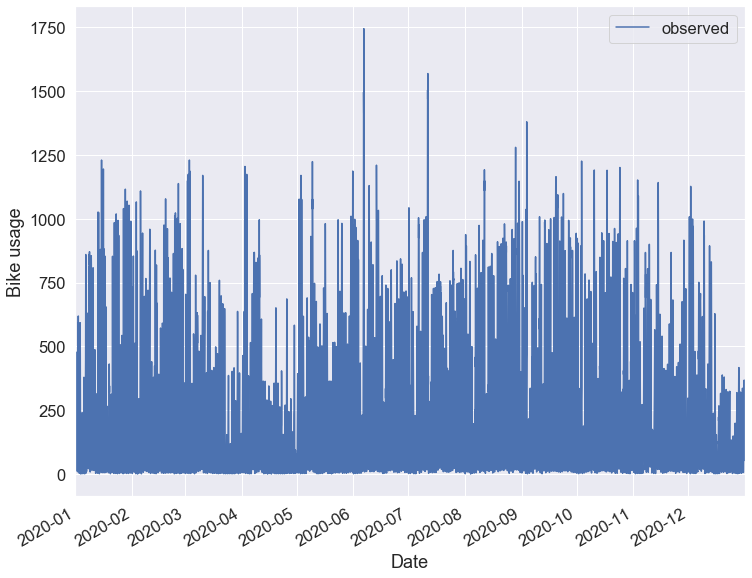

In [47]:
# Plot cnt (number of bike rides) as a function of the date
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale=1.5)
ax = trips["duration"].iloc[-12000:].plot(label='observed')
ax.set_xlabel('Date')
ax.set_ylabel('Bike usage')
plt.legend()

plt.show()

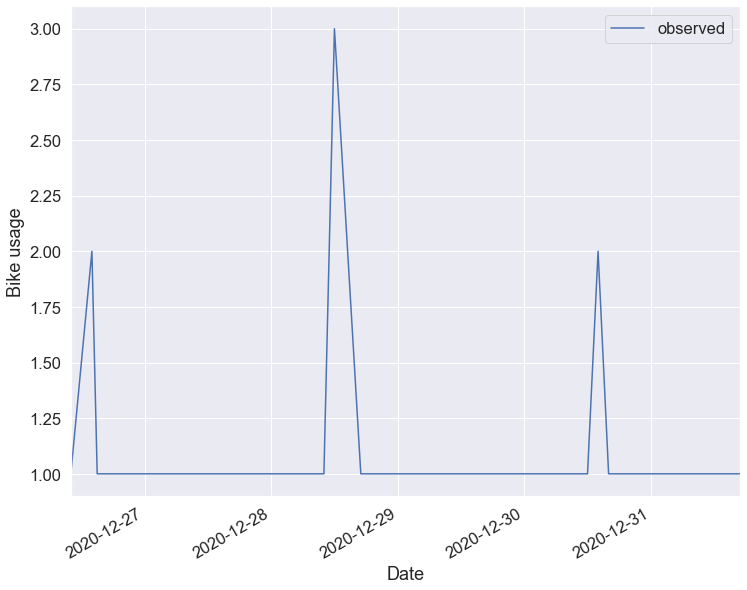

In [25]:
# Plot cnt (number of bike rides) as a function of the date
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale=1.5)
ax = trips_31245["duration"].iloc[-24:].plot(label='observed')
ax.set_xlabel('Date')
ax.set_ylabel('Bike usage')
plt.legend()

plt.show()